 - https://stackoverflow.com/questions/70278957/python-fitting-curve-with-integral-func/70694744#70694744
 - https://en.wikipedia.org/wiki/Debye_model
 - https://en.wikipedia.org/wiki/Debye_function
 - https://en.wikipedia.org/wiki/Dulong%E2%80%93Petit_law

In [26]:
import numpy as np
from scipy import integrate, optimize, stats
import matplotlib.pyplot as plt
np.random.seed(123)

$$\frac{U}{Nk} = 9T \left({T\over T_{\rm D}}\right)^3\int_0^{T_{\rm D}/T} {x^3\over e^x-1}\, \mathrm{d}x = 3T D_3 \left({T_{\rm D}\over T}\right)$$

$$\frac{C_V}{Nk} = 9 \left({T\over T_{\rm D}}\right)^3\int_0^{T_{\rm D}/T} {x^4 e^x\over\left(e^x-1\right)^2}\, dx$$

$$D_n(x) = \frac{n}{x^n} \int_0^x \frac{t^n}{e^t - 1}\,\mathrm{d}t$$

In [2]:
def Debye(n):
    
    def integrand(t):
        return t**n/(np.exp(t) - 1)
    
    @np.vectorize
    def function(x):
        return (n/x**n)*integrate.quad(integrand, 0, x)[0]
    
    return function

In [3]:
D3 = Debye(3)
def energy(x, theta):
    return 3*x*D3(theta/x)

In [4]:
TD = 428
T = np.arange(25, 551, 20)
Un = energy(T, TD)
Ur = Un + 10*np.random.randn(Un.size)

In [5]:
parameters, covariance = optimize.curve_fit(energy, T, Ur, (300,))
parameters, covariance

(array([424.20465445]), array([[11.97832334]]))

In [41]:
Normal = stats.norm()
z = Normal.ppf(0.975)            # 1.959963984540054
CI = z*np.sqrt(covariance[0,0])  # 6.783379383753078

In [6]:
Uhat = energy(T, *parameters)

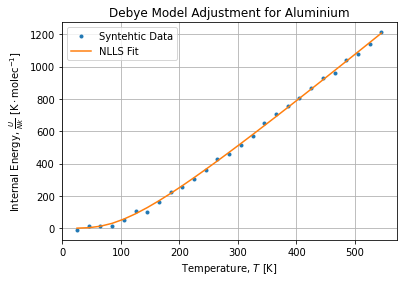

In [24]:
fig, axe = plt.subplots()
axe.plot(T, Ur, '.', label="Syntehtic Data")
axe.plot(T, Uhat, '-', label="NLLS Fit")
axe.set_title("Debye Model Adjustment for Aluminium")
axe.set_xlabel(r"Temperature, $T$ $[\mathrm{K}]$")
axe.set_ylabel(r"Internal Energy, $\frac{U}{Nk}$ $[\mathrm{K \cdot molec^{-1}}]$")
axe.legend()
axe.grid()

In [8]:
Tlin = np.linspace(1, 550, 10000)

In [21]:
Ulin = energy(Tlin, *parameters)

In [22]:
Cvlin = np.diff(Ulin)/np.diff(Tlin)

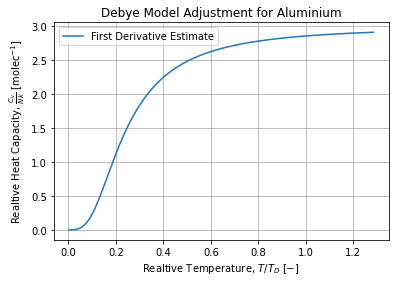

In [25]:
fig, axe = plt.subplots()
axe.plot(Tlin[:-1]/TD, Cvlin, '-', label="First Derivative Estimate")
axe.set_title("Debye Model Adjustment for Aluminium")
axe.set_xlabel(r"Realtive Temperature, $T/T_D$ $[-]$")
axe.set_ylabel(r"Realtive Heat Capacity, $\frac{C_v}{Nk}$ $[\mathrm{molec^{-1}}]$")
axe.legend()
axe.grid()

1.959963984540054

In [36]:
N.ppf(0.025)

-1.9599639845400545